<a href="https://colab.research.google.com/github/omajipawar/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_(Omaji_Pawar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

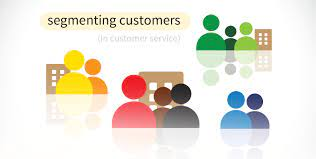

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#Importing python packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/csv files/Online Retail (1).xlsx'

In [4]:
#Reading the dataset
df= pd.read_excel(file_path)

## Data Exploration

In [5]:
#First five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Last five rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
#Shape of dataframe
df.shape

(541909, 8)

There are total 541909 rows and 8 columns in the dataset.

In [8]:
#Basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#Descriptive Summary of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning and Feature Engineering

In [10]:
#Dropping duplicates
print("Shape before dropping duplicates", df.shape)
df = df.drop_duplicates()
print("Shape after dropping duplicates", df.shape)

Shape before dropping duplicates (541909, 8)
Shape after dropping duplicates (536641, 8)


Looking for and handling NaN values

In [11]:
#Check for null values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
# Droping rows having missing values

df = df.dropna()
df.shape

(401604, 8)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Transactions with a letter 'C' at the beginning of its invoice numbers are canceled transactions, so we drop them.

In [14]:
# Drop cancelled transactions
indx = df.InvoiceNo[df.InvoiceNo.str.contains('C') == True].index
df.drop(index= indx, inplace= True)

Some transaction have a sale price of zero, these could be free gifts for some customers and not true sales transaction. So, we will drop them.

In [15]:
# Drop transactions with price zero
indx = df.loc[df.UnitPrice== 0].index
df.drop(index= indx, inplace= True)

In [16]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)

In [17]:
# Changing the datatype of "InvoiceDate" column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

#Creating new variables year, month and day
df['year']= df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day

In [18]:
#Creating new column showing the total amount spend on each transaction
df['total_amount'] = df['UnitPrice']*df['Quantity']

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


## EDA and Visualization

**1. How many orders (per month)?**

In [20]:
#Get the number of orders per month
df.groupby('month')['InvoiceNo'].count().sort_values(ascending=False).reset_index()

,month,InvoiceNo
0,11,63168
1,10,48793
2,12,42696
3,9,39669
4,5,28073
5,6,26926
6,3,26870
7,8,26790
8,7,26580
9,4,22433


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


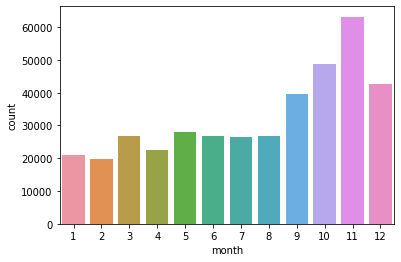

In [21]:
#Plotting a countplot of month wise orders
sns.countplot(df['month'])

* We can see that the months with higher sales were oct, nov and dec.

**2. What products are in the top 5 in revenue?**

In [22]:
#Getting the top 5 products with highest revenue
top_5_products = df.groupby('Description')['total_amount'].sum().sort_values(ascending=False).reset_index().head()
top_5_products

,Description,total_amount
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142264.75
2,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
3,JUMBO BAG RED RETROSPOT,85040.54
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


[Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
 Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
 Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
 Text(0, 0, 'JUMBO BAG RED RETROSPOT'),
 Text(0, 0, 'MEDIUM CERAMIC TOP STORAGE JAR')]

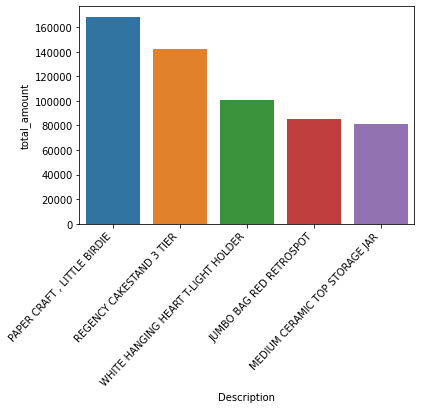

In [23]:
#Plotting a bar plot showing top 5 products with highest revenue
ax= sns.barplot(x='Description',y='total_amount',data=top_5_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")

**3. In which months the sales were higher?**

In [24]:
#month wise revenue
Total_per_month=df.groupby(['year','month'])['total_amount'].sum()
Total_per_month

year  month
2010  12        570422.730
2011  1         568101.310
      2         446084.920
      3         594081.760
      4         468374.331
      5         677355.150
      6         660046.050
      7         598962.901
      8         644051.040
      9         950690.202
      10       1035642.450
      11       1156205.610
      12        517190.440
Name: total_amount, dtype: float64

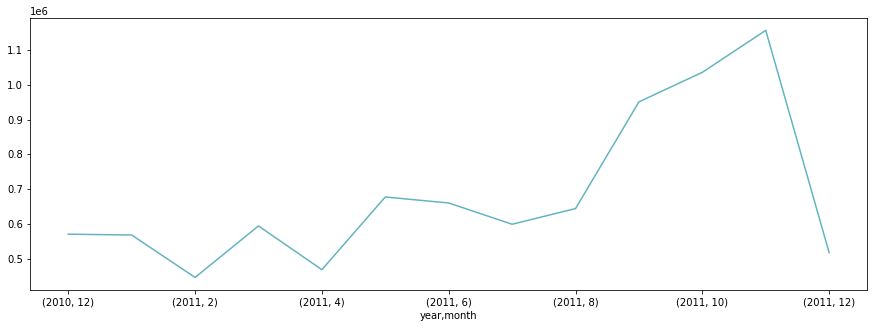

In [25]:
#plotting month wise revenue
Total_per_month.plot(kind='line', color='#63b3c0',figsize=(15,5))



*   Highest revenue recorded in November 2011.
*   February 2011 has lowest revenue.



**4. What's the total revenue per country?**

In [26]:
df.groupby('Country')['total_amount'].sum().sort_values(ascending=False).reset_index()

,Country,total_amount
0,United Kingdom,7285024.644
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


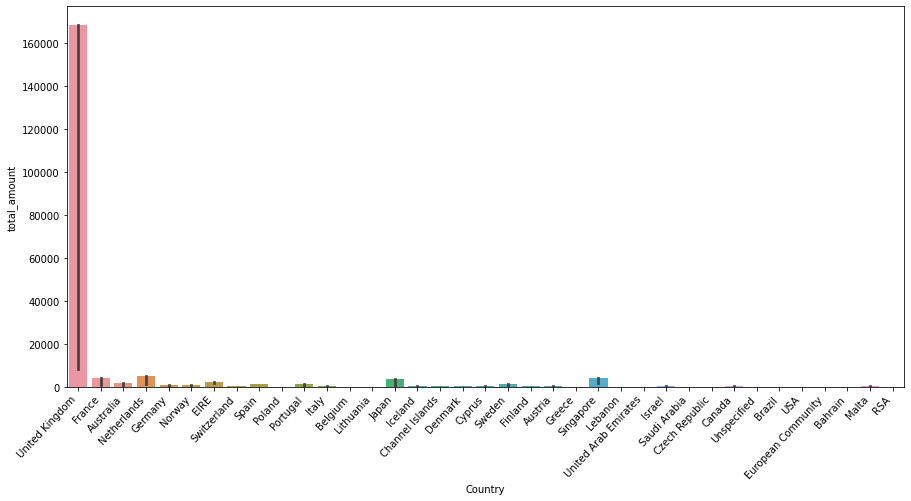

In [27]:
#Plotting a bar plot showing country wise total amount
plt.figure(figsize=(15,7))
ax=sns.barplot(x='Country', y='total_amount',data=df,estimator=max)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

* As expected, the company receives the highest number of orders in the UK (since it is a UK based company).

## Data Preparation

As customer clusters may vary by geography, I’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [28]:
df = df[df['Country']=='United Kingdom']
#check the shape
df.shape

(349203, 12)

We are going to analysis the Customers based on below 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of tracsactions
* M (Monetary): Total amount of transactions (revenue contributed)

In [29]:
# New Attribute : Monetary

df['Monetary'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [30]:
# New Attribute : Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4412
3,12749.0,199
4,12820.0,59


In [31]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Monetary,Frequency
0,12346.0,77183.60,1
1,12747.0,4196.01,103
2,12748.0,33053.19,4412
3,12749.0,4090.88,199
4,12820.0,942.34,59


In [32]:
# New Attribute : Recency


# Convert datetime to proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')


# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])
max_date



Timestamp('2011-12-09 12:49:00')

In [33]:
# Compute the difference between max date and transaction date

df['Recency'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,total_amount,Monetary,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30,15.30,373 days 04:23:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,20.34,373 days 04:23:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00,22.00,373 days 04:23:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,20.34,373 days 04:23:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,20.34,373 days 04:23:00


In [34]:
# Compute last transaction date to get the recency of customers

rfm_r = df.groupby('CustomerID')['Recency'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,Recency
0,12346.0,325 days 02:48:00
1,12747.0,1 days 22:15:00
2,12748.0,0 days 00:29:00
3,12749.0,3 days 02:53:00
4,12820.0,2 days 21:37:00


In [35]:
# Extract number of days only

rfm_r['Recency'] = rfm_r['Recency'].dt.days
rfm_r.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


In [36]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_r, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12747.0,4196.01,103,1
2,12748.0,33053.19,4412,0
3,12749.0,4090.88,199,3
4,12820.0,942.34,59,2


### Outliers

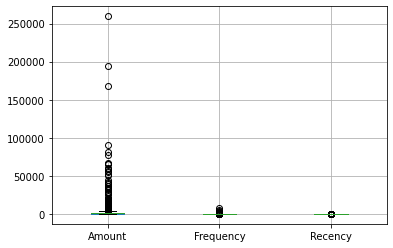

In [37]:
#Plotting Boxplot
rfm.boxplot()

In [38]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [39]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
1,12747.0,4196.01,103,1
3,12749.0,4090.88,199,3
4,12820.0,942.34,59,2
5,12821.0,92.72,6,213
6,12822.0,948.88,46,70


### Feature Scaling

It is extremely important to rescale the variables so that they have a comparable scale.

 There are two common ways of rescaling:

* Min-Max scaling
* Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [40]:
#Importing StandardScalar
from sklearn.preprocessing import StandardScaler

In [41]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3848, 3)

In [42]:
#Making a dataframe of scaled values
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,1.750573,0.279916,-0.919086
1,1.688274,1.254203,-0.899021
2,-0.177542,-0.166633,-0.909054
3,-0.681025,-0.704521,1.207790
4,-0.173667,-0.298568,-0.226848


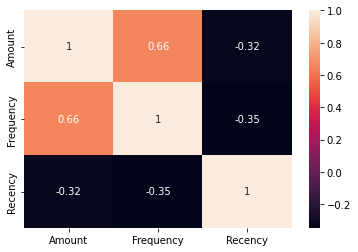

In [43]:
#Plotting a heatmap 
sns.heatmap(rfm_df_scaled.corr(),annot=True)



*   'Amount' is highly correlated with 'Frequency'




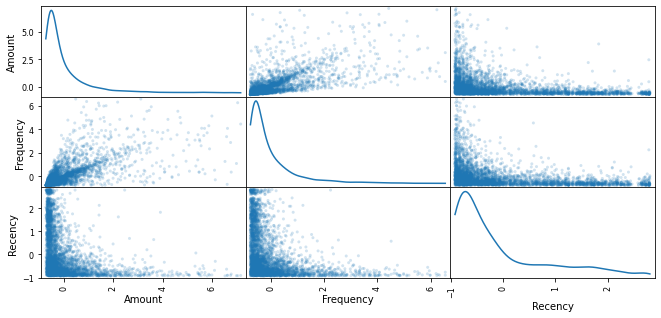

In [44]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(rfm_df_scaled, alpha = 0.2, figsize = (11,5), diagonal = 'kde');